# Statistical Analysis of the sensor data

### Exploratory Data Analysis code for collected temperature pressure data"
    
### Sensor Data EXP1 -Test 03
   
- Experiment duration: 01.05.2024 - 01.06.2024
- Total samples: 81,456
- Sampling Period: 30 seconds
- Microcontroller: rpi picoW
- Sensor: Bosch BMP280 temperature pressure sensor
- Sensor data transfer from sensor to MCU via I2C
- Sensor data transfer to server via MQTT Wirelessly
- Data logging using InfluxDB then extracted using python scripts
    

In [19]:
# Libraries and modules

#Numerical computing Libraries

import pandas as pd
import numpy as np
import scipy as sp

# Statistical Libraries
import statsmodels.api as sm 
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

#Data Visualization Libraries
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns


%matplotlib inline


In [3]:
# Figure settings

sns.set_theme(style="whitegrid")

rcParams['axes.spines.bottom'] = True
rcParams['axes.spines.left'] = True
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False

In [4]:
# Load the data
data = pd.read_csv('SD_Test-03_InfluxDB_extracted.csv')
print(data.head())

   Message_counter  Temperature  Pressure                    Timestamp
0              0.0        24.51  97240.55  2024-05-01T01:44:25.775000Z
1              1.0        24.49  97241.12  2024-05-01T01:44:56.153000Z
2              2.0        24.50  97240.63  2024-05-01T01:45:25.843000Z
3              3.0        24.45  97241.20  2024-05-01T01:45:56.050000Z
4              4.0        24.44  97240.86  2024-05-01T01:46:25.794000Z


In [6]:
# Converting Timestamp to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='ISO8601')

In [7]:
# Converting Pressure into Kilo pascal

data['Pressure_kPa'] = data['Pressure']*.001
print(data.head())

   Message_counter  Temperature  Pressure                        Timestamp  \
0              0.0        24.51  97240.55 2024-05-01 01:44:25.775000+00:00   
1              1.0        24.49  97241.12 2024-05-01 01:44:56.153000+00:00   
2              2.0        24.50  97240.63 2024-05-01 01:45:25.843000+00:00   
3              3.0        24.45  97241.20 2024-05-01 01:45:56.050000+00:00   
4              4.0        24.44  97240.86 2024-05-01 01:46:25.794000+00:00   

   Pressure_kPa  
0      97.24055  
1      97.24112  
2      97.24063  
3      97.24120  
4      97.24086  


### Data Visualizations

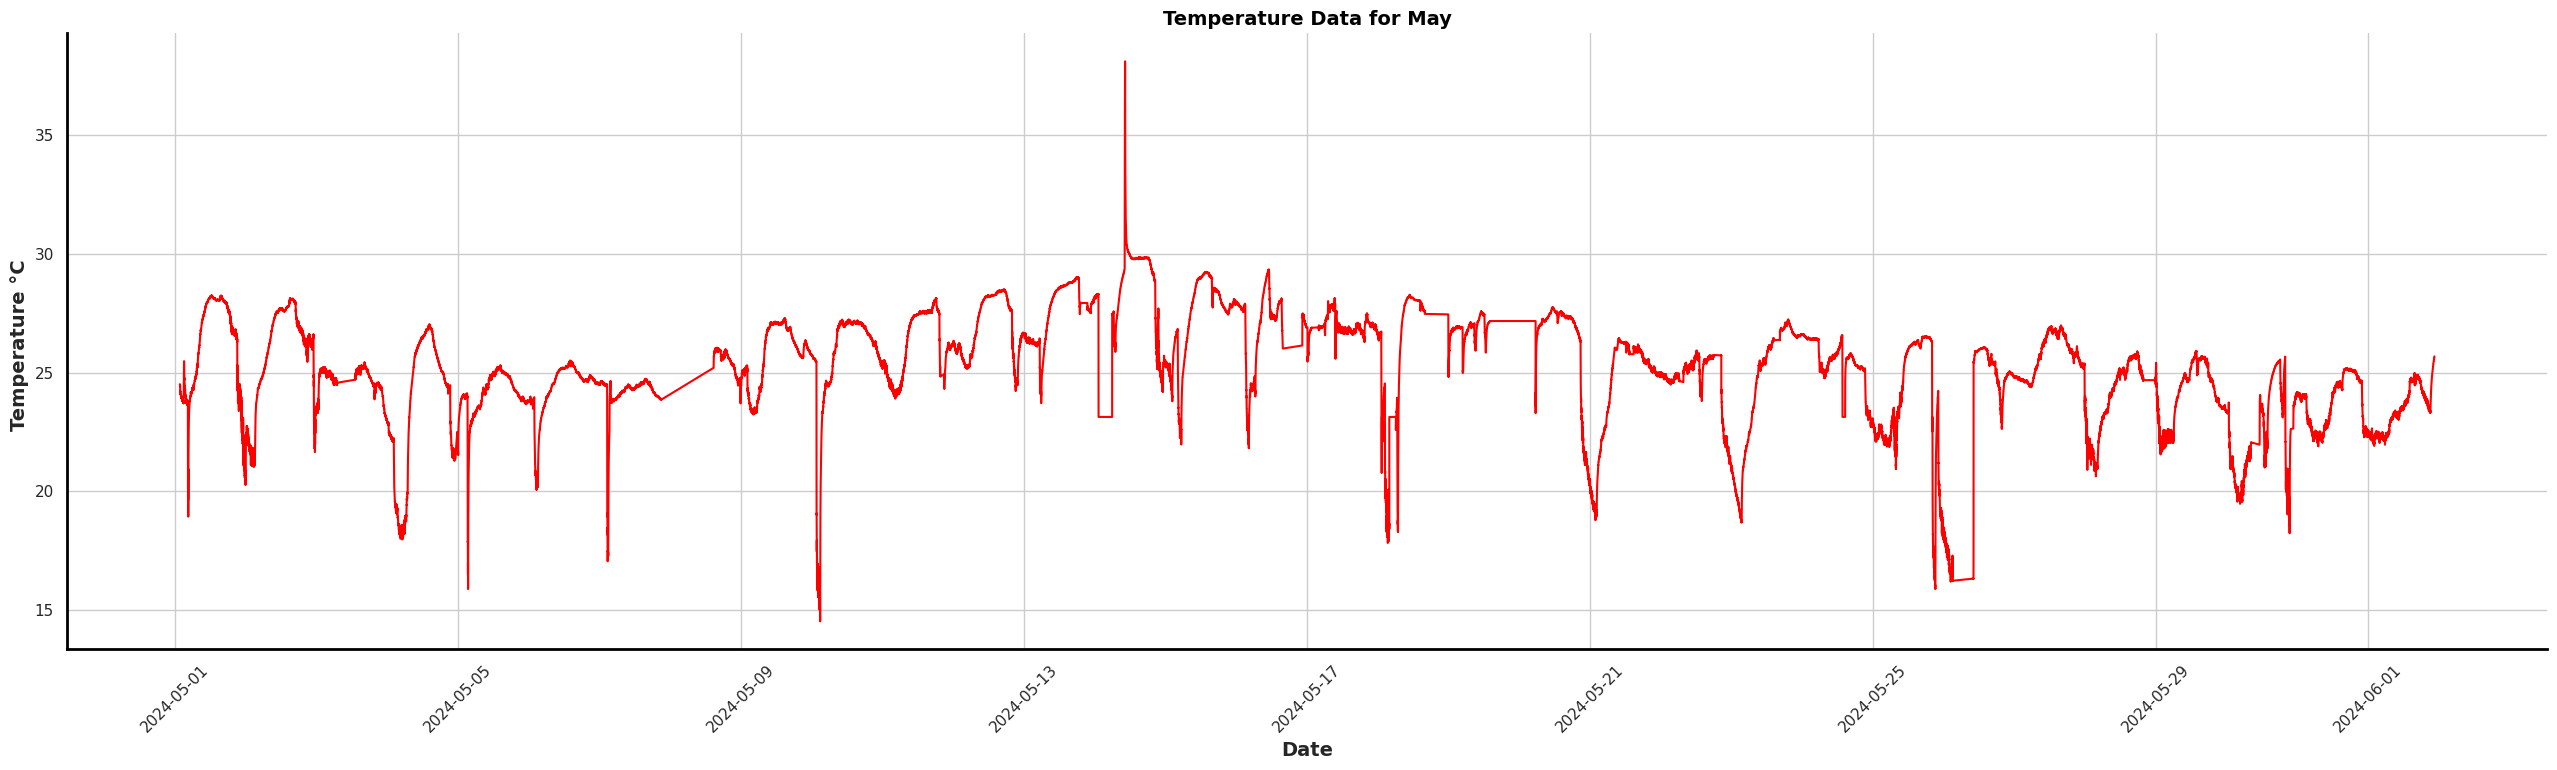

In [9]:
# Time series Plot for Temperature

plt.plot(data['Timestamp'], data['Temperature'], color='red')
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Temperature °C ', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)

plt.title('Temperature Data for May', fontsize=14, fontweight='bold', color='black')

sns.despine()
rcParams['axes.linewidth'] = 2
rcParams['axes.edgecolor'] = 'black'
rcParams['figure.figsize'] = (32, 8)
plt.show()

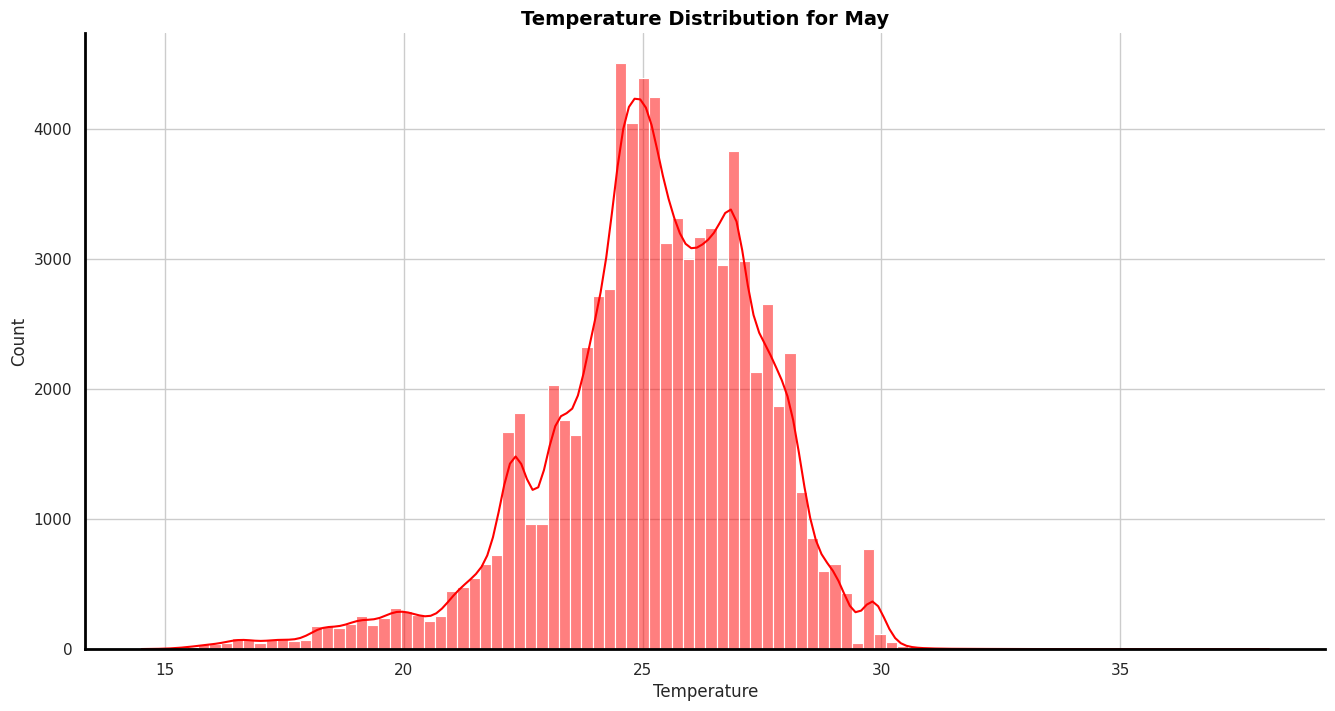

In [10]:
# Temperature Distribution
plt.figure(figsize=(16, 8))
sns.histplot(data['Temperature'], kde=True, color='red', bins=100)
plt.title('Temperature Distribution for May', fontsize=14, fontweight='bold', color='black')
plt.show()

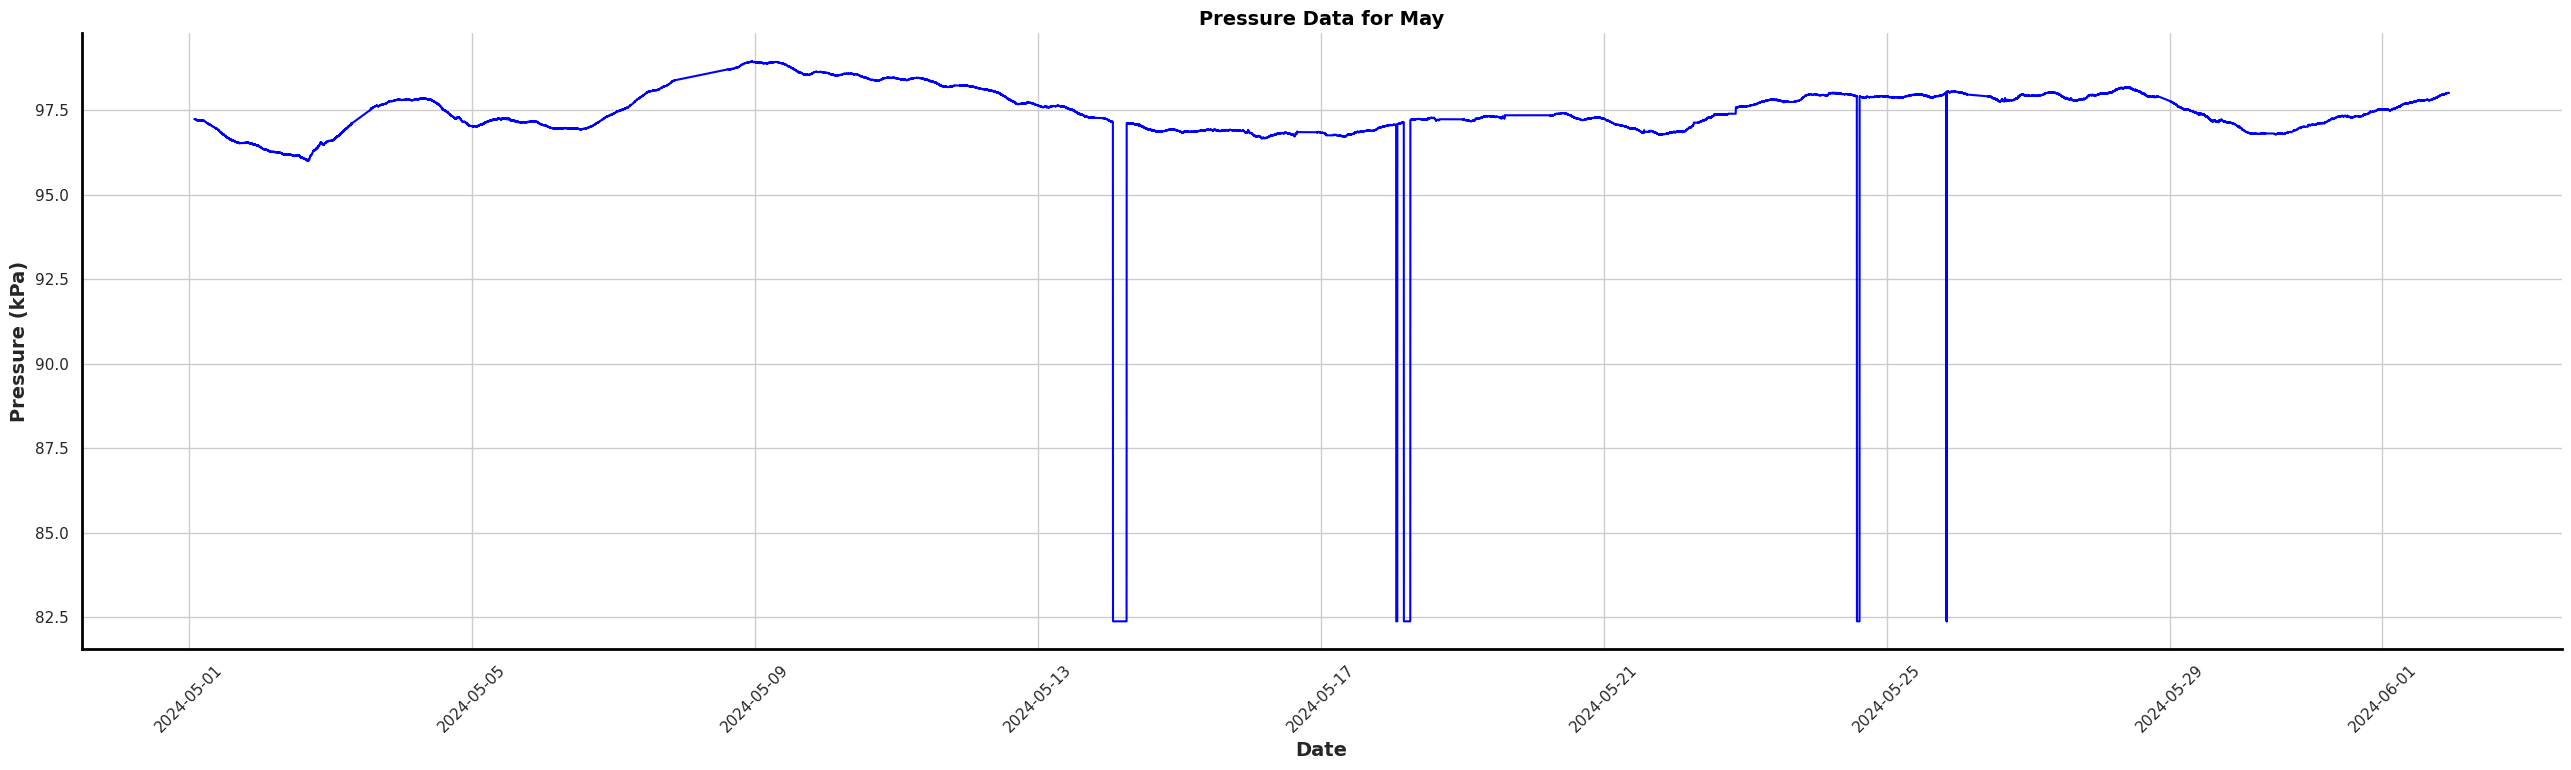

In [11]:
# Time series Plot for Pressure

plt.plot(data['Timestamp'], data['Pressure_kPa'], color='blue')
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Pressure (kPa)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)

plt.title('Pressure Data for May', fontsize=14, fontweight='bold', color='black')

sns.despine()
rcParams['axes.linewidth'] = 2
rcParams['axes.edgecolor'] = 'black'
rcParams['figure.figsize'] = (32, 8)
plt.show()

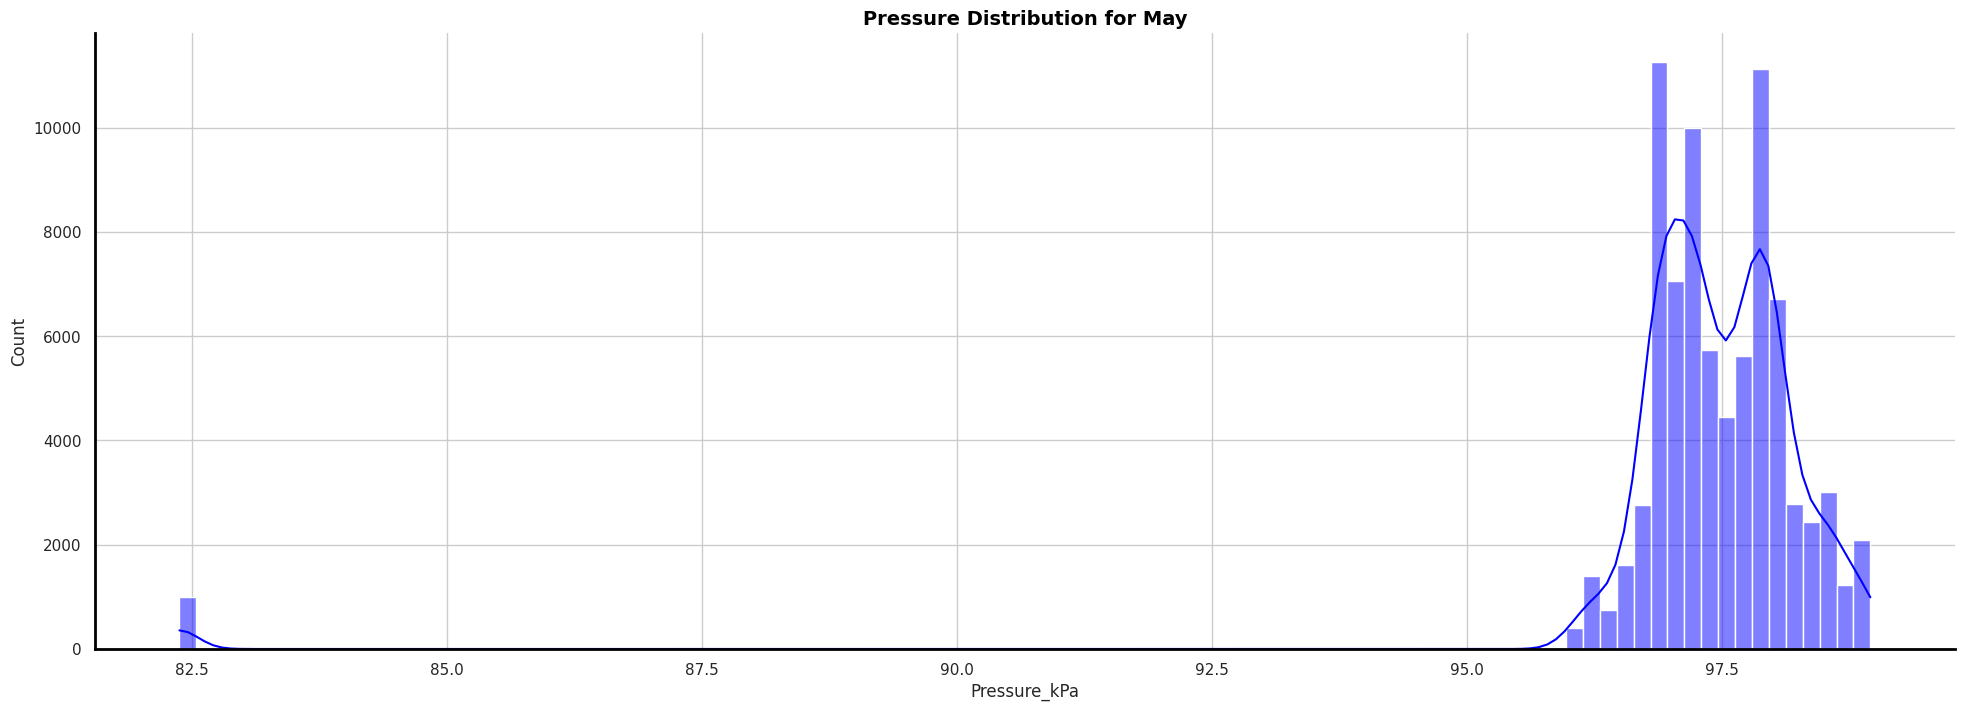

In [12]:
# Pressure Distribution
plt.figure(figsize=(24, 8))
sns.histplot(data['Pressure_kPa'], kde=True, color='blue', bins=100)
plt.title('Pressure Distribution for May', fontsize=14, fontweight='bold', color='black')
plt.show()

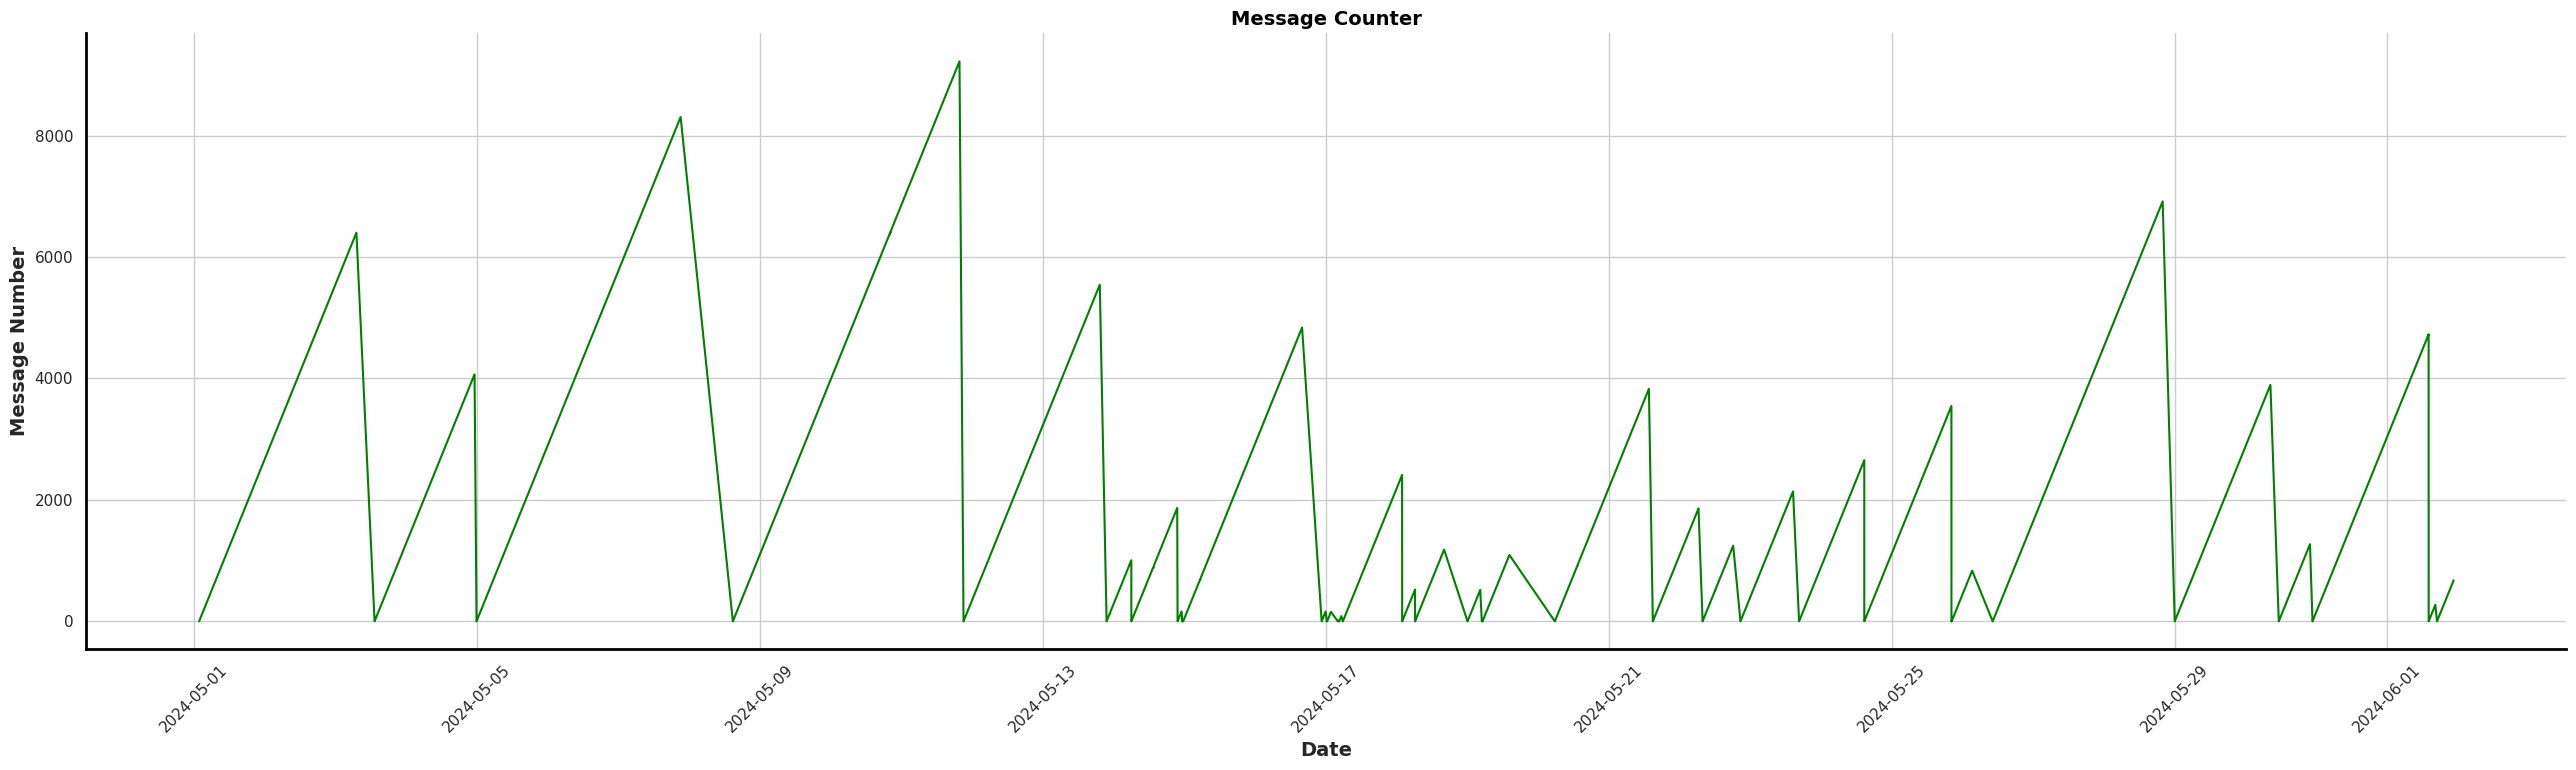

In [13]:
# Time series Plot for Message Counter

plt.plot(data['Timestamp'], data['Message_counter'], color='green')
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Message Number', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)

plt.title('Message Counter', fontsize=14, fontweight='bold', color='black')

sns.despine()
rcParams['axes.linewidth'] = 2
rcParams['axes.edgecolor'] = 'black'
rcParams['figure.figsize'] = (32, 8)
plt.show()

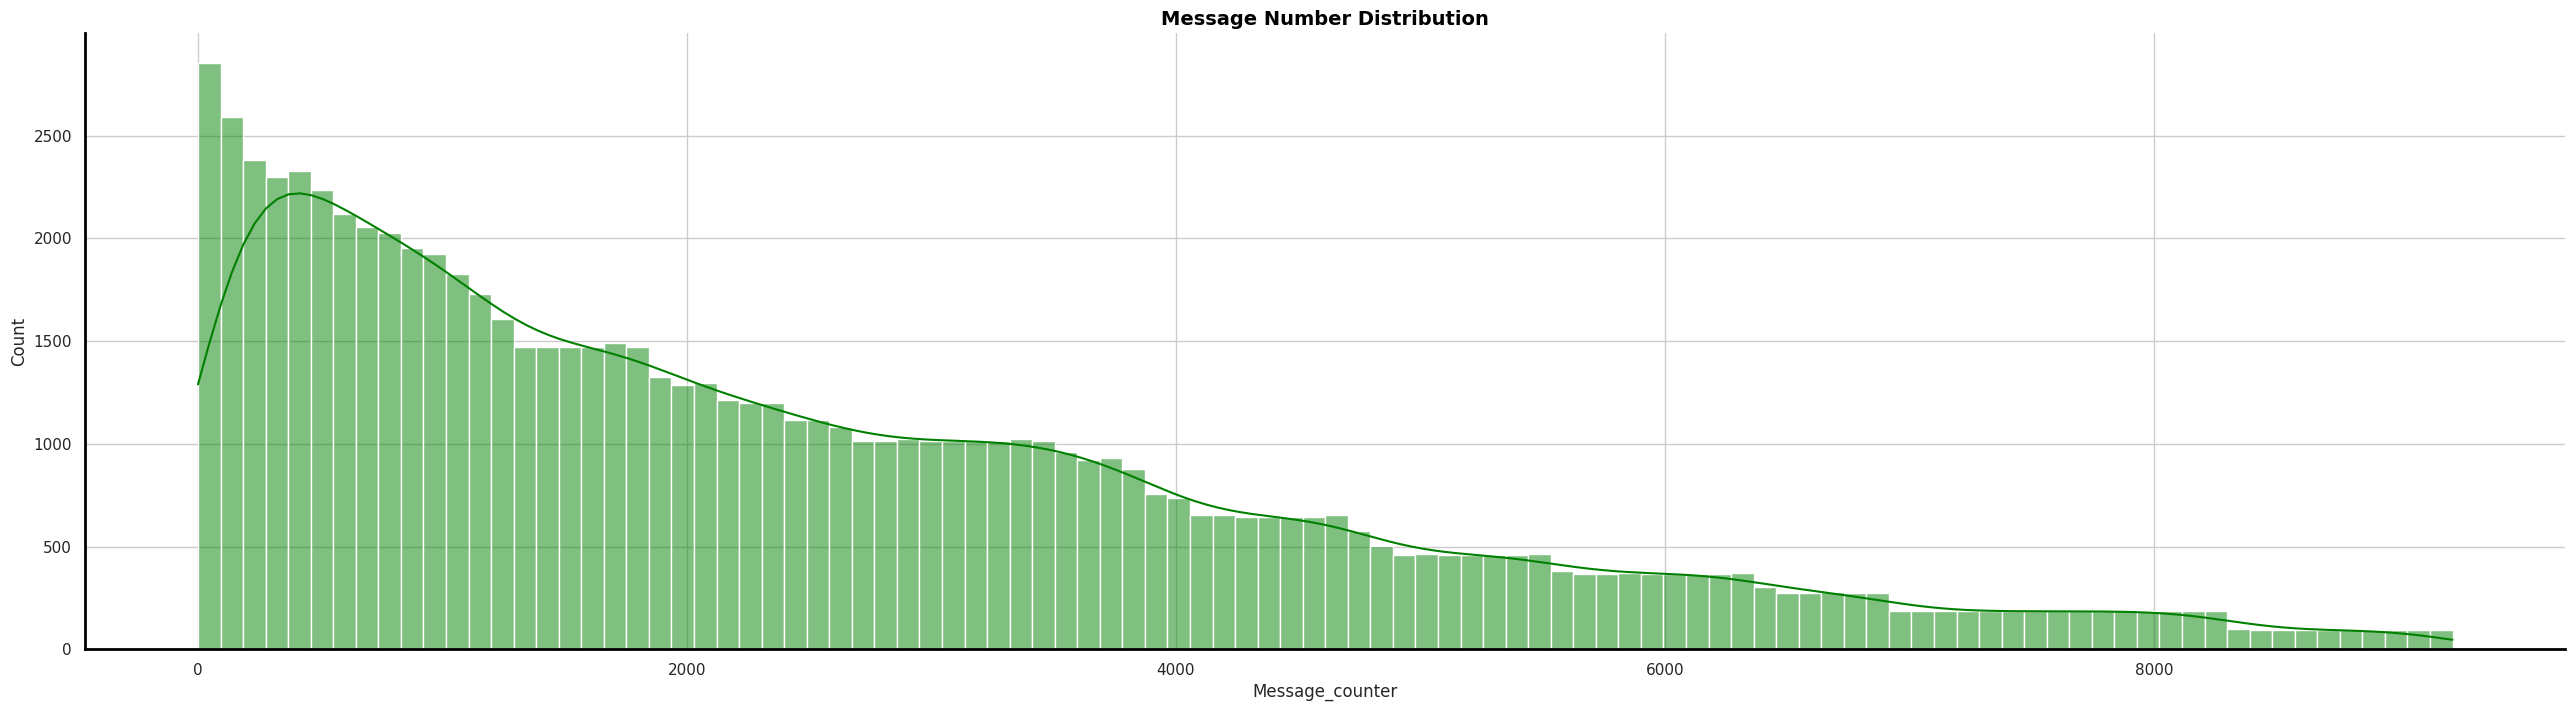

In [14]:
# Message Distribution
plt.figure(figsize=(32, 8))
sns.histplot(data['Message_counter'], kde=True, color='green', bins=100)
plt.title('Message Number Distribution', fontsize=14, fontweight='bold', color='black')
plt.show()

### Descriptive Statistics

In [15]:
# 1. Basic Statistical Analysis
print("Basic Statistical Analysis")
message_stats = data['Message_counter'].describe()
temp_stats = data['Temperature'].describe()
pressure_stats = data['Pressure'].describe()


print("\nMessage Counter Statistics:\n", message_stats)
print("\nTemperature Statistics:\n", temp_stats)
print("\nPressure Statistics:\n", pressure_stats)


Basic Statistical Analysis

Message Counter Statistics:
 count    81457.000000
mean      2523.377070
std       2096.333695
min          0.000000
25%        806.000000
50%       1982.000000
75%       3737.000000
max       9222.000000
Name: Message_counter, dtype: float64

Temperature Statistics:
 count    81457.000000
mean        25.191694
std          2.253579
min         14.520000
25%         24.030000
50%         25.280000
75%         26.800000
max         38.110000
Name: Temperature, dtype: float64

Pressure Statistics:
 count    81457.000000
mean     97315.502993
std       1770.930916
min      82381.080000
25%      96980.190000
50%      97395.830000
75%      97933.920000
max      98950.950000
Name: Pressure, dtype: float64


In [ ]:
# 2. Dickey-Fuller Test for Stationarity

result = sm.tsa.adfuller(data['Temperature'])


# Unpack and print the results
adf_statistic, p_value, used_lag, n_obs, critical_values, icbest = result

print(f"ADF Statistic: {adf_statistic}")
print(f"p-value: {p_value}")
print(f"Number of Lags Used: {used_lag}")
print(f"Number of Observations: {n_obs}")
print("Critical Values:")
for key, value in critical_values.items():
    print(f"   {key}: {value}")


# Decision
if p_value < 0.05:
    print("The time series is stationary (reject the null hypothesis).")
else:
    print("The time series is non-stationary (fail to reject the null hypothesis).")


ADF Statistic: -7.315858303175617
p-value: 1.2298650914242735e-10
Number of Lags Used: 64
Number of Observations: 81392
Critical Values:
   1%: -3.4304303458109944
   5%: -2.86157551150022
   10%: -2.566788901544525
The time series is stationary (reject the null hypothesis).


In [ ]:
result = sm.tsa.adfuller(data['Pressure_kPa'], autolag='AIC')


# Unpack and print the results
adf_statistic, p_value, used_lag, n_obs, critical_values, icbest = result

print(f"ADF Statistic: {adf_statistic}")
print(f"p-value: {p_value}")
print(f"Number of Lags Used: {used_lag}")
print(f"Number of Observations: {n_obs}")
print("Critical Values:")
for key, value in critical_values.items():
    print(f"   {key}: {value}")


# Decision
if p_value < 0.05:
    print("The time series is stationary (reject the null hypothesis).")
else:
    print("The time series is non-stationary (fail to reject the null hypothesis).")


ADF Statistic: -11.43724820389023
p-value: 6.303789970424759e-21
Number of Lags Used: 58
Number of Observations: 81398
Critical Values:
   1%: -3.4304303398883667
   5%: -2.861575508882553
   10%: -2.5667889001512254
The time series is stationary (reject the null hypothesis).


In [16]:
# 3. Correlation Analysis

correlation = data['Temperature'].corr(data['Pressure_kPa'])
print(f"\nCorrelation between Temperature and Pressure: {correlation}")



Correlation between Temperature and Pressure: 0.0597982644079112


In [17]:
# 4. Outlier Detection
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series > upper_bound)]

temp_outliers = detect_outliers(data['Temperature'])
pressure_outliers = detect_outliers(data['Pressure_kPa'])

print("\nTemperature Outliers:\n", temp_outliers)
print("\nPressure Outliers:\n", pressure_outliers)



Temperature Outliers:
 332      19.77
333      19.62
334      19.68
335      19.87
336      19.79
         ...  
75735    18.41
75736    18.23
75737    18.86
75738    19.29
75739    19.69
Name: Temperature, Length: 2351, dtype: float64

Pressure Outliers:
 33975    82.38108
33976    82.38108
33977    82.38108
33978    82.38108
33979    82.38108
           ...   
62871    82.38108
62872    82.38108
62873    82.38108
62874    82.38108
62875    82.38108
Name: Pressure_kPa, Length: 998, dtype: float64


In [ ]:
# Write code to fit an ARMA model to the temperature data. Plot the ARMA Model and the data on the same graph


                               SARIMAX Results                                
Dep. Variable:            Temperature   No. Observations:                81457
Model:                 ARIMA(5, 1, 0)   Log Likelihood              100880.378
Date:                Sun, 23 Mar 2025   AIC                        -201748.755
Time:                        17:40:07   BIC                        -201692.908
Sample:                             0   HQIC                       -201731.649
                              - 81457                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1345      0.000    346.452      0.000       0.134       0.135
ar.L2          0.0235      0.001     23.364      0.000       0.022       0.025
ar.L3          0.0526      0.001     65.887      0.0

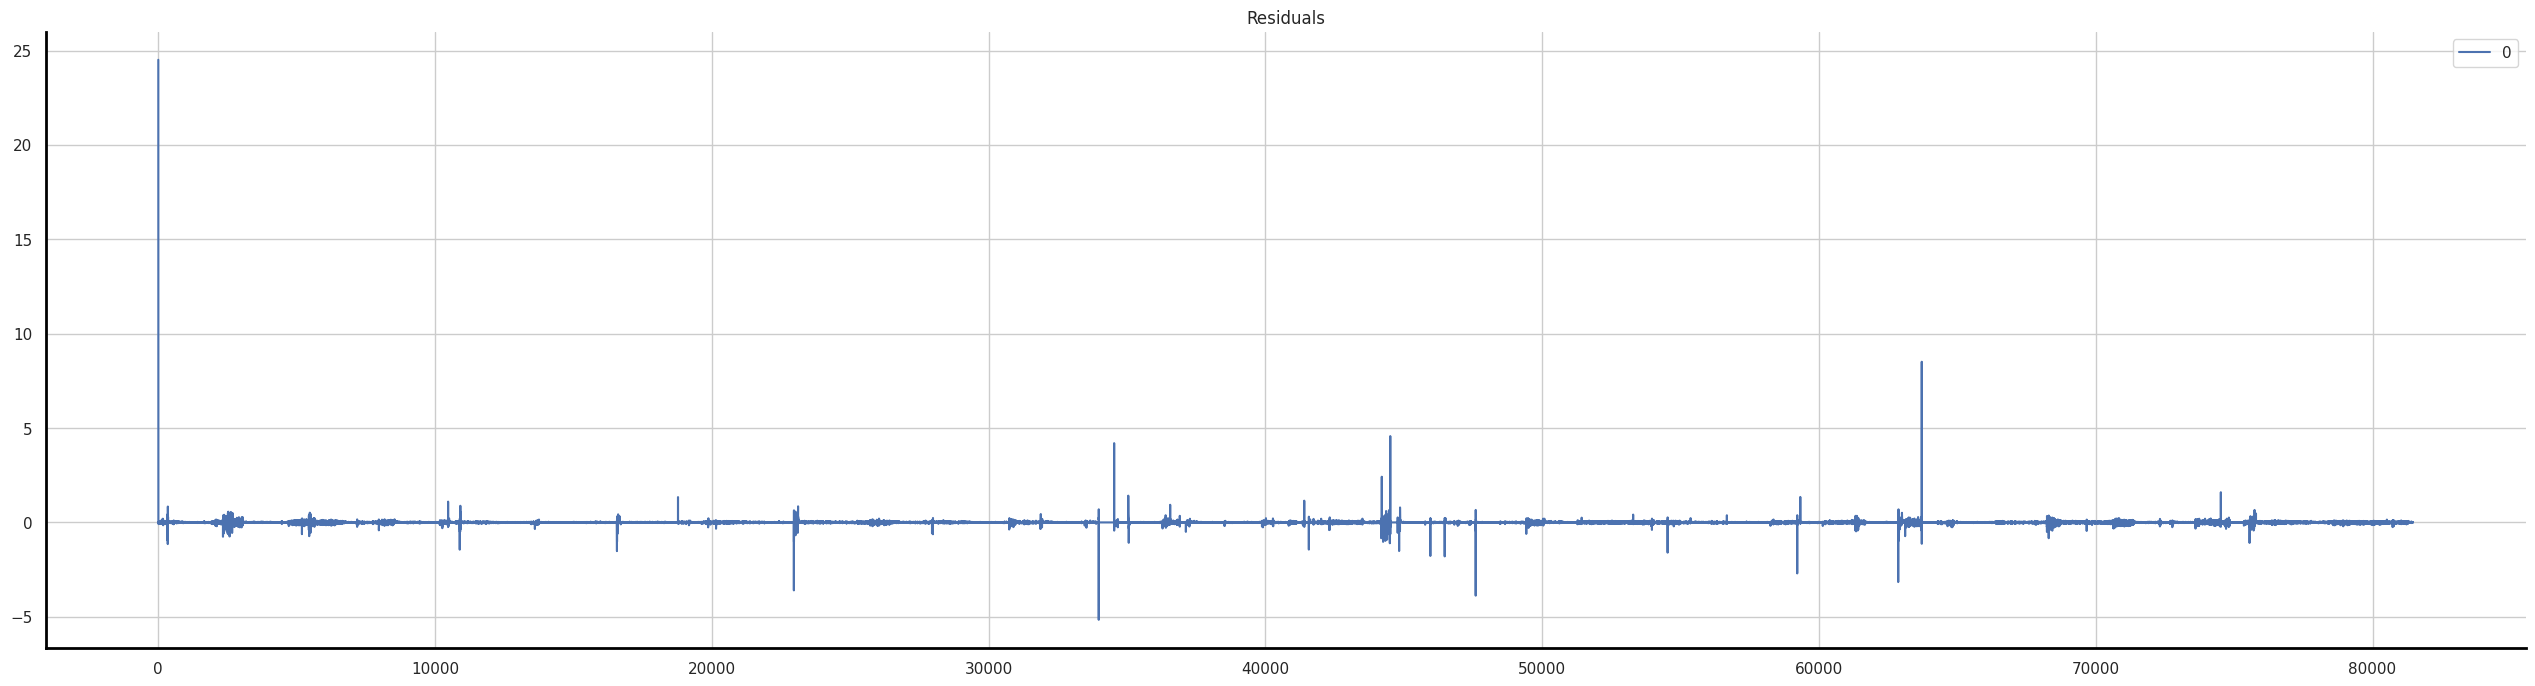

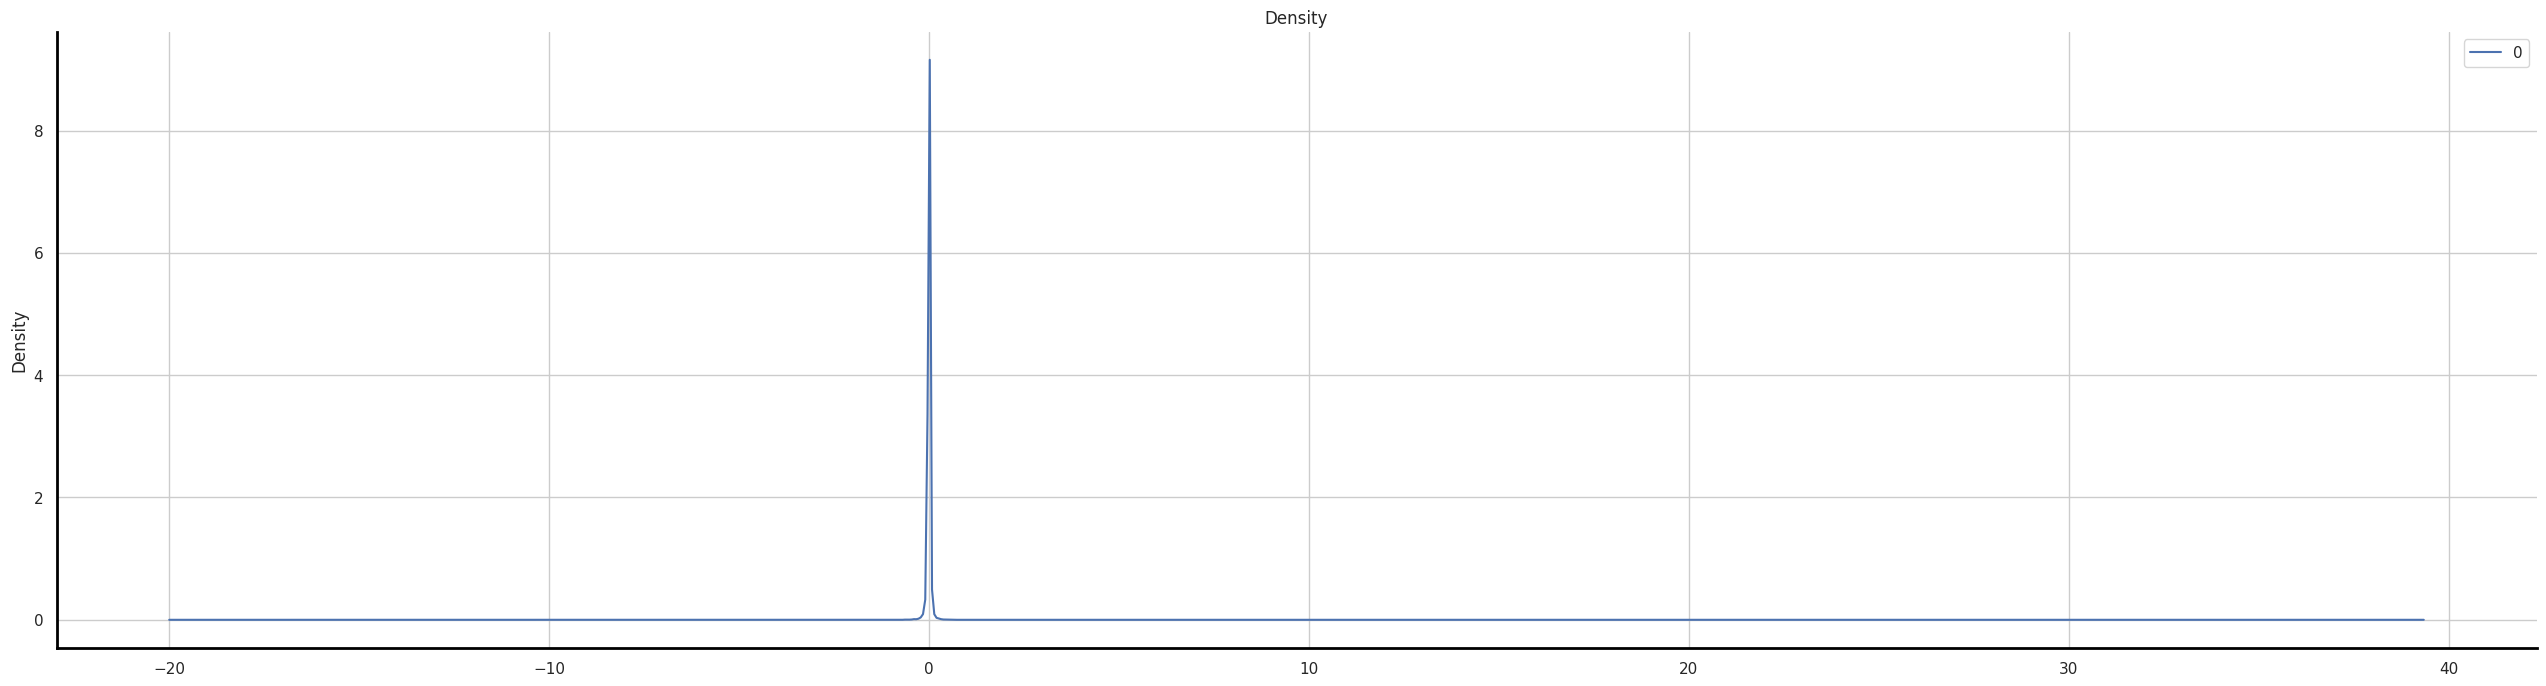

                  0
count  81457.000000
mean       0.000311
std        0.110875
min       -5.159668
25%       -0.010390
50%        0.000173
75%        0.011384
max       24.510000


In [ ]:
# Fit an ARMA model to the temperature data
model = ARIMA(data['Temperature'], order=(5, 1, 0))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Plot the residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title="Residuals")
plt.show()

# Density plot of the residuals
residuals.plot(kind='kde', title='Density')
plt.show()

# Summary statistics of the residuals
print(residuals.describe())